# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
import matplotlib.pyplot as pl
from IPython.display import display # Allows the use of display() for DataFrames

# Import seaborn without warnings
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# Select three indices to sample from the dataset
indices = [100, 198, 305]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  11594   7779    12144    3252              8035          3029
1  11686   2154     6824    3527               592           697
2    243  12939     8852     799              3909           211

#### Additional:

     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
100   62.5  78.6     80.2    73.0              91.4          90.5
198   63.0  34.8     60.9    74.8              43.4          38.9
305    3.6  91.6     69.5    27.0              75.0          11.6


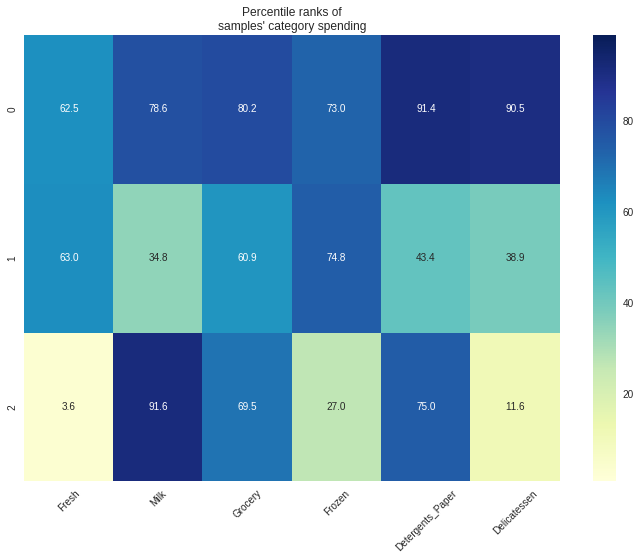

In [4]:
# Make heatmap based on percentile distributions of each sample
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

pl.figure(figsize=(12,8))
sns.heatmap(pcts.reset_index(drop=True), annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
pl.title('Percentile ranks of\nsamples\' category spending')
pl.xticks(rotation=45, ha='center');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Considering the statistical description of the dataset (type of products), and subjectively judging on relative proportion of each type for sample customers:
1. Sample no. 100 (Sample 0 in table) has total purchase cost for 'Milk' and 'Grocery' slightly above 75th percentile, and 'Detergents\_Paper' and 'Delicatessen' squarely falling in the last quartile of their respective categories. The other two product categories lie approximately in the 3rd quartile. So relatively, it appears this customer is a high consumer of detergent products and fine food products, followed by the other categories, which might imply that the type of business associated could be a hotel. Considering the volume of all product categories, it maybe further inferred that this customer could be a medium(-to-large) scale hotel.
2. Sample no. 198 (Sample 1 in table) has the highest total purchase costs for 'Fresh', 'Frozen' and 'Grocery', all of them falling in the third quartiles of their respective categories, followed by 'Milk', 'Detergents\_Paper' and 'Delicatessen' falling in the second quartile. The relative proportions including the high consumption of fresh, frozen and grocery products and the total volume of each product category might indicate that this data point could represent a small-scale retailer or departmental store.
3. Sample no. 305 (Sample 2 in table) has the highest total purchase cost for 'Milk', which lies in the fourth quartile, followed by 'Detergents\_Paper' and 'Grocery' falling in their third quartiles, and finally trailed by the other categories in their first quartiles. The high consumption of milk products, and relatively smaller consumption of other products might indicate that this data point could be a small(-to-medium) scale cafe.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Required test data size
test_size = 0.25

for feature_to_predict in data.columns:    
    new_data = data.copy()
    new_labels = new_data[feature_to_predict]
    new_data.drop([feature_to_predict], axis=1, inplace=True)

    # Split the data into training and testing sets using the given feature as the target  
    random_state = np.random.RandomState(101010)
    X_train, X_test, y_train, y_test = train_test_split(
        new_data, new_labels, test_size=test_size, random_state=random_state)

    # Create a decision tree regressor and fit it to the training set    
    regressor = DecisionTreeRegressor(random_state=random_state) # Default params should be OK for this test
    regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    from sklearn.metrics import r2_score
    y_pred = regressor.predict(X_test)
    score = r2_score(y_test, y_pred)
    print "R2 score for predicting [{}] feature is {}".format(feature_to_predict, score)
    
# Random state to be used by all further functions for the project
random_state = np.random.RandomState(101010) # ten-ten-ten

R2 score for predicting [Fresh] feature is -1.18721250685
R2 score for predicting [Milk] feature is -1.06747225492
R2 score for predicting [Grocery] feature is 0.636420923989
R2 score for predicting [Frozen] feature is -2.82322335641
R2 score for predicting [Detergents_Paper] feature is 0.623542625285
R2 score for predicting [Delicatessen] feature is -2.40262777355


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature relevant for identifying a specific customer?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

A test of feature relevance is tried for all features in the dataset. It looks like Fresh, Milk, Frozen and Delicatessen features have, in general, very less correlation with other features and so they cannot be predicted directly as a function of other features; they all have negative R^2 scores. Whereas, there seems to be some correlation with other features of dataset and/or correlation between Grocery and Detergents_Paper features. This is indicated by their positive R^2 scores of around 0.6. 

So, since Fresh, Milk, Frozen and Delicatessen are heavily uncorrelated with other features, they will be valuable to identify specific customer groups. On the other hand, the features Grocery and Detergents_Paper individually will contribute lesser to identifying specific groups as they seem to possess some redundant information when dataset is considered as a whole.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

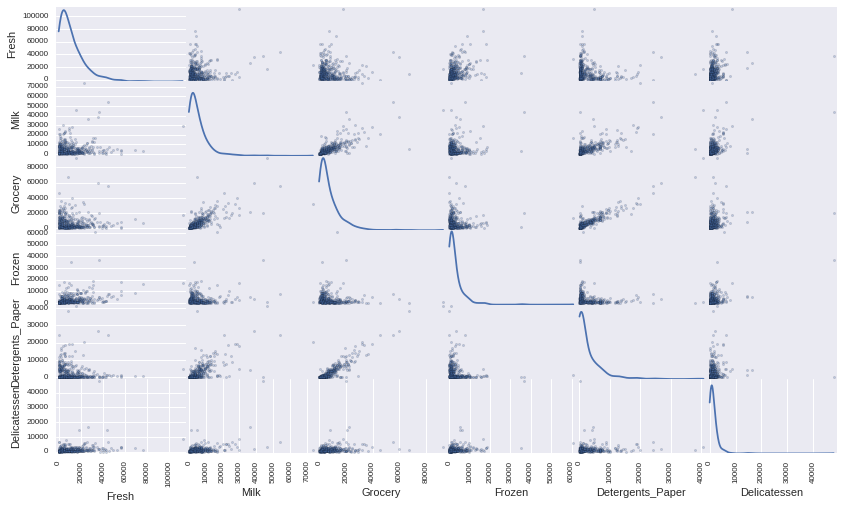

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#### Additional:

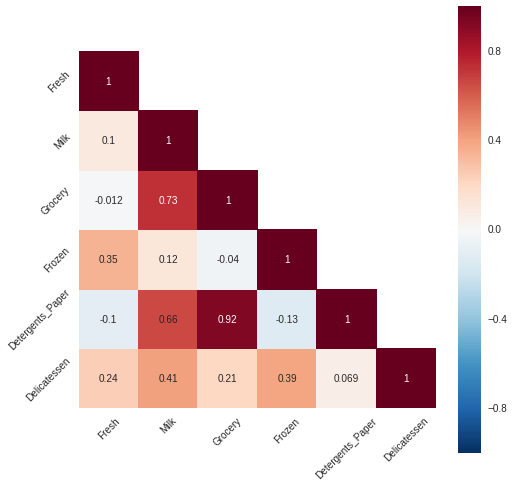

In [7]:
# Construct heatmap of cross-correlation matrix
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    pl.figure(figsize=(8,8))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap='RdBu_r', annot=True)
    pl.xticks(rotation=45, ha='center')
    pl.yticks(rotation=45, va='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

From the scatter plot, it is evident that there is some correlation between 'Grocery' and 'Detergents\_Paper' features. The general shape of {'Grocery', 'Detergents\_Paper'} and {'Detergents\_Paper', 'Grocery'} scatter plots are thin and elongated. That is, there is very less (co-)variance between the pair of features. {'Milk', 'Grocery'} and {'Milk', 'Detergents\_Paper'} (and their inverses) too exhibit slight elongation, but probably not as immediately apparent as 'Grocery' and 'Detergents\_Paper' pair. This confirms the initial suspicions in the "Feature relevance" section that one of the features when considered individually doesn't add much information to the dataset and that one feature was likely heavily used to predict the other. In simpler words, 'Grocery' (label) was being predicted mainly with the information from 'Detergents\_Paper' (feature) and vice-versa in the regressor example above. 

The data points don't follow a Gaussian distribution, mainly because the median of each feature doesn't seem to co-incide with the respective means. Furthermore, a nice symmetric bell curve is not apparent in the diagonal of the scatter plot matrix (although it could be symmetric bell shaped, if not for the cut-off point below which no data points exist.) So in effect, the correlated features {'Grocery', 'Detergents\_Paper'} too don't have Gaussian distributions, with their means and medians quite separated.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

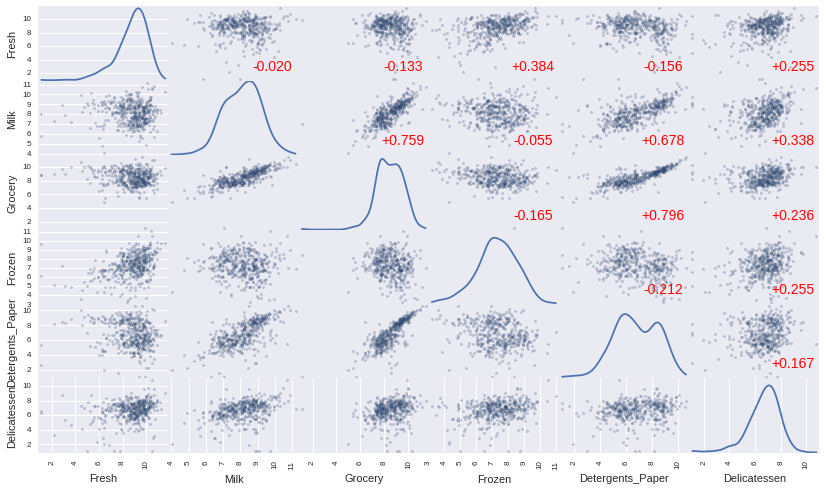

In [8]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
axes = pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# *Additional*
# Annotate scatter matrix with correlations
corr = log_data.corr().as_matrix()
for i, j in zip(*pl.np.triu_indices_from(axes, k=1)):
    axes[i,j].annotate("%+.3f" %corr[i,j], (0.8, 0.2), xycoords='axes fraction', 
                       ha='center', va='center',color="red", fontsize=14)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.358243  8.959183  9.404590  8.087025          8.991562      8.015988
1  9.366147  7.675082  8.828201  8.168203          6.383507      6.546785
2  5.493061  9.468001  9.088399  6.683361          8.271037      5.351858

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
# Describe the log_data so that it may be used as reference to manually inspect outliers
print "Description of the log transformed dataset:"
display(log_data.describe())

outlier_indices = dict()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # Count indices of outliers
    for entry in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist():
        if entry in outlier_indices:
            outlier_indices[entry] += 1
        else:
            outlier_indices[entry] = 1

# OPTIONAL: Select the indices for data points you wish to remove
minFeaturesForOutlier = 2
outliers  = []

for key in outlier_indices:
    if(outlier_indices[key] >= minFeaturesForOutlier):
        outliers.append(key)

print "The samples that were removed on qualifying minFeaturesForOutlier of {} are:".format(minFeaturesForOutlier)
display(log_data.loc[outliers])

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Description of the log transformed dataset:


Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  440.000000  440.000000  440.000000  440.000000        440.000000   
mean     8.730544    8.121047    8.441169    7.301396          6.785972   
std      1.480071    1.081365    1.116172    1.284540          1.721020   
min      1.098612    4.007333    1.098612    3.218876          1.098612   
25%      8.048059    7.334981    7.674616    6.609678          5.548101   
50%      9.048286    8.196159    8.467057    7.330388          6.705018   
75%      9.737064    8.880480    9.273854    8.175896          8.274341   
max     11.627601   11.205013   11.437986   11.016479         10.617099   

       Delicatessen  
count    440.000000  
mean       6.665133  
std        1.310832  
min        1.098612  
25%        6.011875  
50%        6.872645  
75%        7.506728  
max       10.777768

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

The samples that were removed on qualifying minFeaturesForOutlier of 2 are:


Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
128  4.941642  9.087834   8.248791  4.955827          6.967909      1.098612
154  6.432940  4.007333   4.919981  4.317488          1.945910      2.079442
65   4.442651  9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225  7.335634   8.911530  5.164786          8.151333      3.295837
75   9.923192  7.036148   1.098612  8.390949          1.098612      6.882437

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are a couple of data points that have outliers for more than one feature viz., 65, 66, 75, 128 and 154.

Since Tukey's method of outlier detection is only based on cutting off the tails of a distribution — the cut-off point being rather generalized to all kinds of distribution —, it can't objectively be generalized to all cases. In reality, an outlier and its relative importance in the dataset could be influenced by many factors. For instance, consider datapoint 75; it has been categorized as outlier for the features 'Grocery' and 'Detergents\_Paper'. It is important to note that both the feature values lie in the lower cut-off regions. Considering that the other feature values (or consumption in that category) are around 75% of their distributions, it may not really qualify for a real-world business. That is, no known type of business could be buying so many goods of all types except groceries and detergents which eerily look like the least consumed. On the contrary, the business in reality may be a very low consumer of groceries and detergents, and so the data point could be completely valid. Alternatively, another business, like data point 65 may be considered outlier for being on the upper cut-off. That is, some goods are consumed much more than the average. But, the decision not to remove this data point may be motivated by the fact that the representation of very big businesses in the dataset is required at all costs. Only an agent (person or machine) well acquainted with the art or possessing considerable prior knowledge about the data sources would be able to determine the applicabilty of outlier better, but still may not be objective.

For the purposes of this project, an easy scheme of detecting outliers is chosen. If any data point has more than one feature (>=2) considered an outlier based on Tukey's method, that data point is considered an outlier and removed.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. 

In the code block below, you will need to implement the following:
 - Import `sklearn.preprocessing.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Explained ratio of first principal component is 0.44302504749
Explained ratio of first and second principal component is 0.706817230807
Explained ratio of first four principal components is 0.931090109951


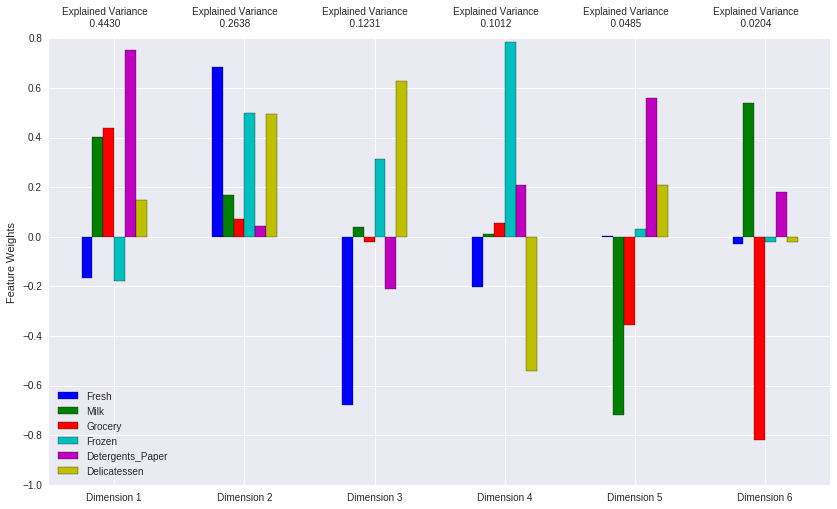

In [11]:
# Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=len(good_data.keys()))
pca.fit(good_data)

# Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

# Print explained variances
print "Explained ratio of first principal component is {}".format(pca.explained_variance_ratio_[0])
print "Explained ratio of first and second principal component is {}".format(np.sum(pca.explained_variance_ratio_[:2]))
print "Explained ratio of first four principal components is {}".format(np.sum(pca.explained_variance_ratio_[:4]))

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first two principal components explain `70.68%` of total variance, and the first four principal components explain `93.1%` total variance.

For ease, the following interpretation of each principal component only considers those features that have weights above magnitude ~0.4:

| Principal component | Reinterpreted in terms of customer spending |
| :-----------------: | :-----------------------------------------: |
| First  | This component increases with increase in 'Milk', 'Grocery' and 'Detergents\_Paper' with highest emphasis on the last category. In effect, this component can be reinterpreted as a measure of spending on milk, grocery and detergents products, with detergents products having the highest influence. Also, the component reveals that all three product categories are highly correlated with each other. That is, generally, increase in one category follows increase in other categories too. |
| Second | This component increases with increase in 'Fresh', 'Frozen' and 'Delicatessen', with most emphasis on the last category. So this component can serve as a measure of spending on frozen, fresh and fine food products. Furthermore, spending on fresh, frozen and fine food products generally follow the same trend. |
| Third  | This component increases with increase in 'Delicatessen' and decrease in 'Fresh', and could represent a measure of heavy consumption (spending) of fine food products **with** very low consumption of fresh products. |
| Fourth | This component increases with increase in 'Frozen' and decrease in 'Delicatessen'. It could represent a measure of combined high consumption of frozen products **and** low consumption of fine food products. |

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       2.3579       1.7393       0.2210       0.2840       0.5939   
1      -0.6058       0.6931      -0.1705       0.5478      -0.0380   
2       2.3804      -2.8989       0.9016       1.2539      -0.6757   

   Dimension 6  
0       0.0148  
1      -0.6545  
2       0.6118

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

#### Additional:

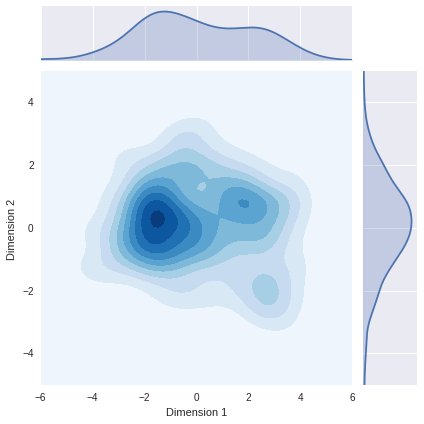

In [14]:
# Make a joint grid of the first two dimensions' KDE
g = sns.JointGrid("Dimension 1", "Dimension 2", reduced_data, xlim=(-6,6), ylim=(-5,5))
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True)
g = g.plot_marginals(sns.kdeplot, shade=True)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       2.3579       1.7393
1      -0.6058       0.6931
2       2.3804      -2.8989

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

[K-Means](http://scikit-learn.org/stable/modules/clustering.html#k-means) is one of the simplest, yet powerful form of clustering algorithm, in which clusters are found by minimizing within-cluster sum-of-squares. Advantages to using K-Means in general are:
- It scales very well to large datasets
- It is fast and easily parallelizable
- It can serve as a good general purpose clustering algorithm

[GMM](http://scikit-learn.org/stable/modules/mixture.html#gmm-classifier) on the other hand is a more generalized clustering algorithm and usually relies on expectation-maximization. Advantages to using GMM in general are:
- It generalizes the K-Means algorithm
- It can cluster data with dissimlar variances/shapes and sizes
- It can directly be used to gain insight into data beyond clustering such as density estimation
- It can effectively facilitate a confidence score for each data point 

Both K-Means and GMM, roughly falling in the same category of clustering methods, have the following disadvantages:
- Number of clusters in the data should be known a priori, although metrics such as silhoutte score or Bayesian information criterion can be used to find the most likely number of clusers
- It is essential the data posseses a flat geometry
- Local optima are unavoidable, and to counter this, both make use of various passes with random starting points

Given any dataset, the first thing to try would be K-Means as it is known to fit well for various application domains. For the wholesale customer dataset too, K-Means naturally fits in as the first try. But, from the scatter matrix plots above, we know that the all features (log tranformed) have roughly Gaussian distributions with more or less similar standard deviations, and each pair of features (except the highly correlated ones) show similar shapes, making it suitable for K-Means. Furthermore, considering that PCA is a linear transformation, and the correlated features have effectively very less influence in the first two principal components, the conditions should be ideal for K-Means, with convex, isotropic data points. Lastly, although it doesn't make a practical difference for the small dataset used in this project, it is known that K-Means scales well and is very efficient computationally in comparison to GMM (preliminary tests with the data showed K-Means performing roughly 3x faster than GMM). So in case more data is available, K-Means should still be the best contender on the PCA transformed dataset. 

Note that GMM based clustering could be used in the project, but it would most likely be an overkill.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Number of clusters to experiment on
num_clusters_list = range(2,11)

# Chosen (best) number of clusters post-experimentation
desired_num_clusters = 2

# Append chosen number to the last of the search list so that the last results are retained
num_clusters_list.append(desired_num_clusters)

# Try with various number of clusters
for num_clusters in num_clusters_list:
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=num_clusters, random_state=random_state, n_init=8, n_jobs=4)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.cluster_centers_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    # Print mean silhoutte score for each number of chosen clusters
    print "Mean silhouette score for {} clusters is {:.4f}".format(num_clusters, score)

Mean silhouette score for 2 clusters is 0.4263
Mean silhouette score for 3 clusters is 0.3974
Mean silhouette score for 4 clusters is 0.3315
Mean silhouette score for 5 clusters is 0.3500
Mean silhouette score for 6 clusters is 0.3619
Mean silhouette score for 7 clusters is 0.3619
Mean silhouette score for 8 clusters is 0.3491
Mean silhouette score for 9 clusters is 0.3633
Mean silhouette score for 10 clusters is 0.3520
Mean silhouette score for 2 clusters is 0.4263


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

Mean silhoutte scores for 2 clusters through to 10 clusters were calculated above. Silhoutte score for 2 clusters is 0.4263 and that for 3 clusters is 0.3974. For higher number of clusters, the silhoutte score saturates (or most likely follows a very shallow dip) near ~0.34.

The best silhouette score is for 2 clusters and the same will be used in the further sections.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

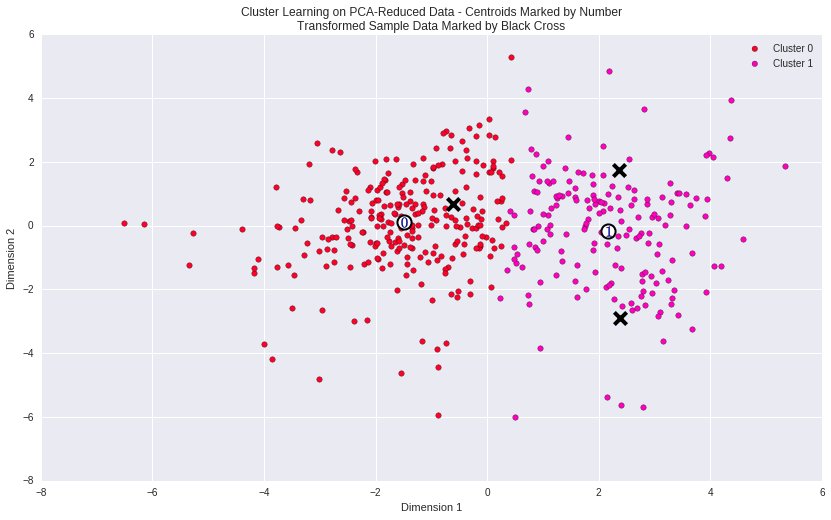

In [17]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   8867  1897     2477    2088               294           681
Segment 1   4005  7900    12104     952              4561          1036

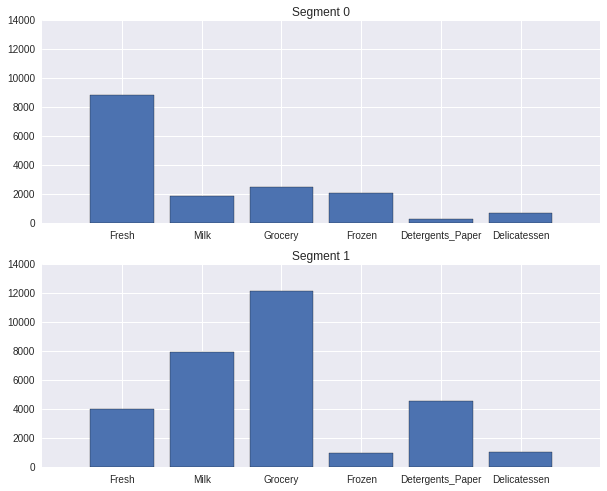

In [18]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Plot bar graphs of each segment for a more visual interpretation
pl.figure(figsize=(10,8))
pl.subplot(211)
pl.bar(range(len(true_centers.columns)), true_centers.loc['Segment 0'], tick_label=true_centers.columns, align='center')
pl.ylim([0,14000])
pl.title('Segment 0')
pl.subplot(212)
pl.bar(range(len(true_centers.columns)), true_centers.loc['Segment 1'], tick_label=true_centers.columns, align='center')
pl.ylim([0,14000])
pl.title('Segment 1')
pl.show()

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Judging based on the relative amounts of total purchase cost (from the bar graphs above) for each product category, and referencing them against the statistical description of the dataset:
1. Segment 0 has the highest spending on 'Fresh' and 'Frozen', falling in the 3rd quartile of the distribution of the entire dataset, followed by other product categories in the 2nd quartile. Since relatively fresh and frozen products are the most consumed, this segment can most likely be associated with retail type of establishment.
2. Segment 1 has the highest spending on 'Milk', 'Grocery' and 'Detergents\_Paper', lying in the 4th quartile of the dataset distribution, trailed by other categories below their respective means. Thus, the higher usage of milk, grocery and detergents products could be associated with a hotel.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


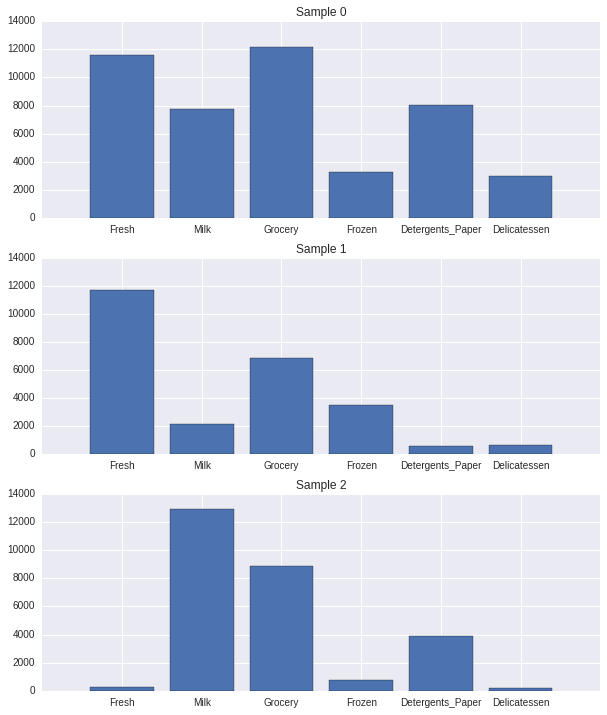

In [19]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
# Draw bar graphs of each sample customer to compare against the clustered segments
pl.figure(figsize=(10,12))
pl.subplot(311)
pl.bar(range(len(samples.columns)), samples.loc[0], tick_label=samples.columns, align='center')
pl.ylim([0,14000])
pl.title('Sample 0')
pl.subplot(312)
pl.bar(range(len(samples.columns)), samples.loc[1], tick_label=samples.columns, align='center')
pl.ylim([0,14000])
pl.title('Sample 1')
pl.subplot(313)
pl.bar(range(len(samples.columns)), samples.loc[2], tick_label=samples.columns, align='center')
pl.ylim([0,14000])
pl.title('Sample 2')
pl.show()

**Answer:**

The bar graphs of each product category for each sample is plotted above. Comparing this against the bar graphs of the predicted segments, it can be said that:
1. Sample point 0 matches very close to Segment 1 for 'Milk', 'Grocery' and 'Detergents\_Paper' product categories.  Although 'Fresh' differs by quite a bit in Sample 0, it shouldn't affect overall classification significantly.
2. Sample point 1 has high correlation with Segment 0, mainly due to 'Fresh' and 'Frozen' product categories, although there is slight variance in 'Grocery'. However, the variance doesn't appear significant enough to affect the sample to be categorized as Segment 0.
3. Sample point 2 has very high correlation with Segment 1 for 'Milk', 'Grocery' and 'Detergents\_Paper' product categories, and the other categories have relatively insignificant differences. Thus, this sample could clearly be classified as Segment 1.

These inferences are consistent with the the initial interpretations, as well as the predictions of the clusterer.

#### Additional:

Centers:
           Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   52.3  30.5     30.5    58.7              28.3          37.6
Segment 1   28.7  79.0     79.9    35.1              79.2          52.9
Samples:
     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
100   62.5  78.6     80.2    73.0              91.4          90.5
198   63.0  34.8     60.9    74.8              43.4          38.9
305    3.6  91.6     69.5    27.0              75.0          11.6


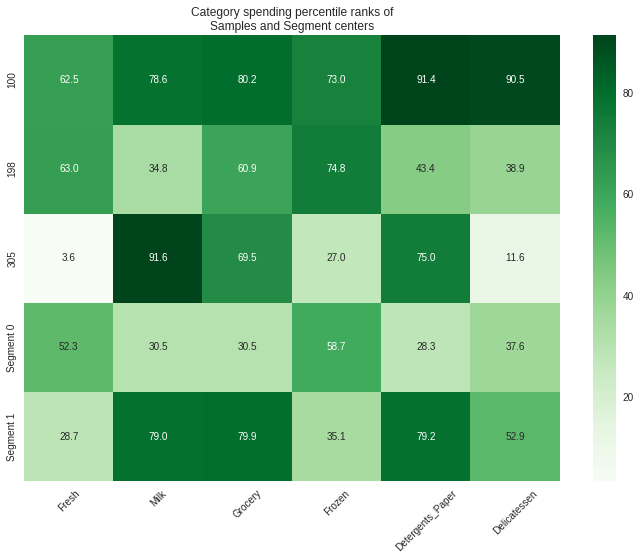

In [20]:
# Make a combined heamap of samples and segments (cluster centers)

# Append cluster centers to dataset
new_data = data.append(true_centers)

# Obtain percentiles of those centers
ctr_pcts = 100. * new_data.rank(axis=0, pct=True).loc[['Segment 0', 'Segment 1']].round(decimals=3)
print "Centers:"
print ctr_pcts
print "Samples:"
print pcts

# Visualize on a heatmap
pl.figure(figsize=(12,8))
sns.heatmap(pcts.append(ctr_pcts), annot=True, cmap='Greens', fmt='0.1f')
pl.xticks(rotation=45, ha='center')
pl.title('Category spending percentile ranks of\nSamples and Segment centers')
pl.show()

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

One of the possible ways of conducting an A/B test with the given clustered dataset is to test the new delivery service with half of the entire customer dataset, keeping the other half as control group. An experimental group needs to be created by randomly sampling half of the customers from both the clusters. (It is important to randomly sample to avoid any biases.) The other half serves as the control group. The experimental group then should be tested with the new delivery service cycle, and the control group should be kept on the old delivery cycle. Feedback from each group should then be taken about the customer satisfaction with the ongoing delivery service. It is instrumental to take feedback from the control group as well as the experimental group. From the feedback, any potential resistance from a type of business (ex: hotels that would prefer a steady supply of 5 days a week instead of 3 days a week) can be assessed from a particular cluster of the experimental group that provides significant customer dissatisfaction. More importantly, this result from experimental group should be corroborated by minimal customer dissatisfaction with the control group from the same cluster. Thus, the cluster that suffered from the change in delivery service in the experimental group can be generalized to apply to the entire cluster.

It is important to note that the controlled experiment mentioned above could be rather simplistic, and in reality, nuances such as a particular subset of a given cluster might need to be addressed or biased towards. This may be eased by introducing more features to the dataset such as total purchase cost to assess the overall size, or region (urban/rural) etc.

### Question 11
*Assume the wholesale distributor wanted to predict some other feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*

**Answer:**

To aid further analysis, the cluster a customer belongs to (or customer segment) could be used as an additional feature in a supervised learning algorithm. A contrived example could be derived from the delivery service cycle change example from above. Consider that ground truth from a survey that furnishes "Readiness to adapt to 3 day per week cycle" for a few customers is obtained. This _feature_ can be used as a _label_ to train a supervised learning algorithm, with an additional input indicating the cluster a customer belongs to. If some correlation exists, then the learning algorithm will be able to use the information of customer segment to reach better accuracies in predicting "Readiness to adapt to 3 day per week cycle" for all customers. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

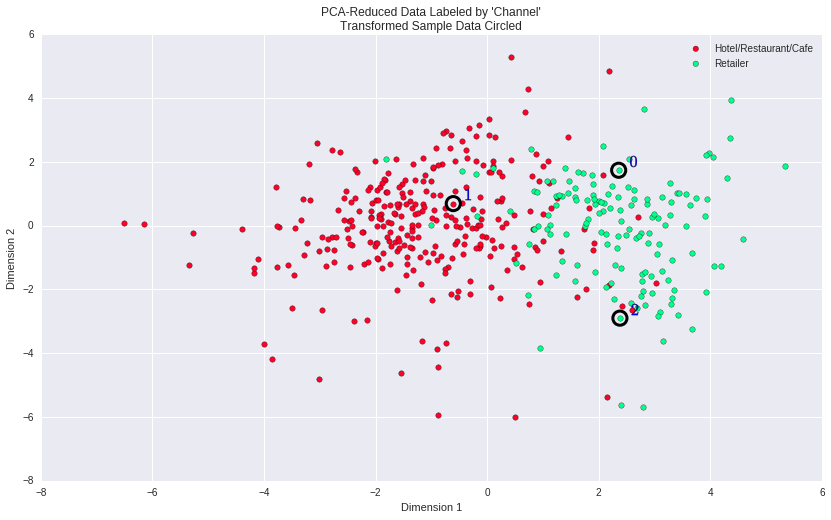

In [21]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering algorithm realized above that separates the customers into 2 groups, correlates well with the above visualization. There are a few data points of the `'Channel'` feature that are interspersed in the regions clustering algorithm has predicted to be homogeneous, but they don't seem to affect the _bigger picture_. Such data points however would be hard to categorize accurately with most common clustering algorithms.

It is worthy to note that, although the objective identification of two clusters has been performed, with the algorithm being completely agnostic to `'Channel'`, there is an inversion in the **subjective interpretation** of `'Channel'`. That is, _my_ subjective analysis of the dataset and its various tranformations such as the initial interpretation, PCA component etc., is completely opposite to the feature `'Channel'`. My interpretation of a 'Hotel/Restaurant/Cafe' from the relative propotions of the total purchase costs turns out to be 'Retailers' according to `'Channel'`. This is why, to my interpretation, Sample 0 and 2 are hotels and Sample 1 is a retailer, whereas, `'Channel'` indicates that Sample 0 and 2 belongs to 'Retailers' and Sample 1 belongs to 'Hotel/Restaurant/Cafe'. This doesn't adversely affect the integrity of the project however as the _name_ of a customer segment is irrelevant to the underlying data structure.